In [28]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#波士顿房价预测数据集（回归问题）
boston = load_boston()

data = boston.data
target = boston.target

print(data.shape)
print(target.shape)

#拆分数据集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

#展示数据维度
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [52]:
class LinearRegression:
    def __init__(self):
        self.w_hat_star = None
        self.n_features = None
    
    def fit(self, x, y):
        '''
        模型训练
        公式3.11, 3.12
        '''
        #满足数据要求
        assert isinstance(x, np.ndarray), isinstance(y, np.ndarray)
        assert x.ndim==2, y.ndim==1
        assert x.shape[0] == y.shape[0]
        
        #制作矩阵X 公式3.9上面的X
        self.n_features = x.shape[1]
        n_example = x.shape[0]
        extra = np.ones(n_example)
        X = np.c_[x, extra]
        
        if self.n_features >= n_example:  #判定X.T.dot(X)是否为正定矩阵或满秩矩阵 （对应公式3.11上一行）
            raise ValueError('num of examples <= num of features')
        
        #求公式3.11
        self.w_hat_star = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
        #求公式3.12   原书公式貌似有错误，不需要X转置
        y_hat = X.dot(self.w_hat_star) 
        
    def predict(self, x):
        '''
        模型预测
        公式3.12
        '''
        #制作矩阵X 公式3.9上面的X
        n_example = x.shape[0]
        extra = np.ones(n_example)
        X = np.c_[x, extra]
        
        #求公式3.12   原书公式貌似有错误，不需要X转置
        y_hat = X.dot(self.w_hat_star) 
        
        return y_hat


#计算rmse      
def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y-y_hat)))
   
        
        
        

In [55]:
#numpy
lr = LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print(rmse(y_test, y_hat))

4.257532413352959


In [56]:
#sklearn
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)
print(rmse(y_test, y_hat))

4.257532413353118


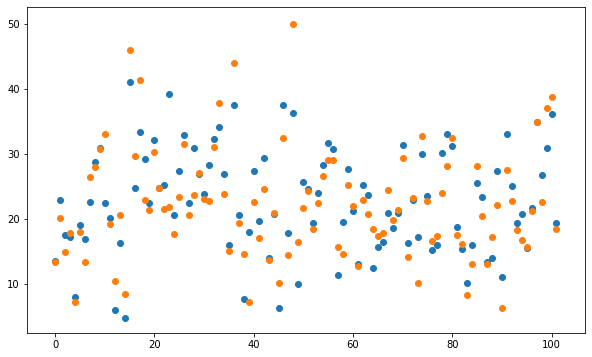

In [57]:
figure = plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_hat)), y_hat)
plt.scatter(range(len(y_test)), y_test)